In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)

In [2]:
from brs.ingestion import LoadKaggleDataset, LoadLocalDataset
import brs.config as config

In [3]:
lld = LoadLocalDataset()

data_books = lld.load_dataset("books")
data_users = lld.load_dataset("users")
data_ratings = lld.load_dataset("ratings")

d:\z\Conspects\_Summer\BRS\brs\ingestion\load_local.py:42: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(dataset_path)


In [4]:
from brs.feature_engineering import AgeGroupsFeature, CountryFeature

data_users = AgeGroupsFeature().apply_transformation(data_users)
data_users = CountryFeature().apply_transformation(data_users)
data_users.head()

,User-ID,Location,Age,Age_group,Countries
0,1,"nyc, new york, usa",NaN,NaN,usa
1,2,"stockton, california, usa",18.0,13-17,usa
2,3,"moscow, yukon territory, russia",NaN,NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,13-17,portugal
4,5,"farnborough, hants, united kingdom",NaN,NaN,kingdom


users total size 278858
           NaN count   NaN %
User-ID            0    0.0%
Location           0    0.0%
Age           110762  39.72%
Age_group     111128  39.85%
Countries       2889   1.04%
books total size 271360
                     NaN count NaN %
ISBN                         0  0.0%
Book-Title                   0  0.0%
Book-Author                  2  0.0%
Year-Of-Publication          0  0.0%
Publisher                    2  0.0%
Image-URL-S                  0  0.0%
Image-URL-M                  0  0.0%
Image-URL-L                  3  0.0%
ratings total size 1149780
             NaN count NaN %
User-ID              0  0.0%
ISBN                 0  0.0%
Book-Rating          0  0.0%


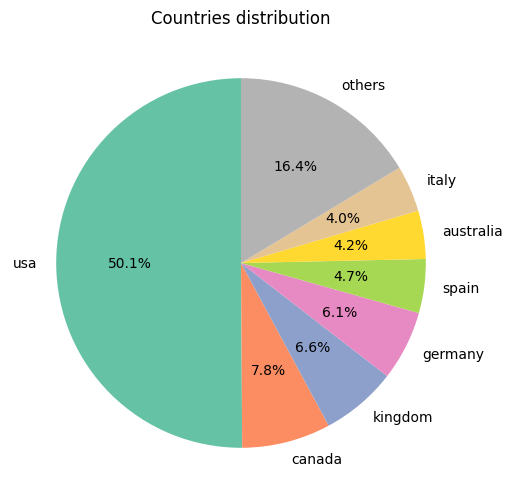

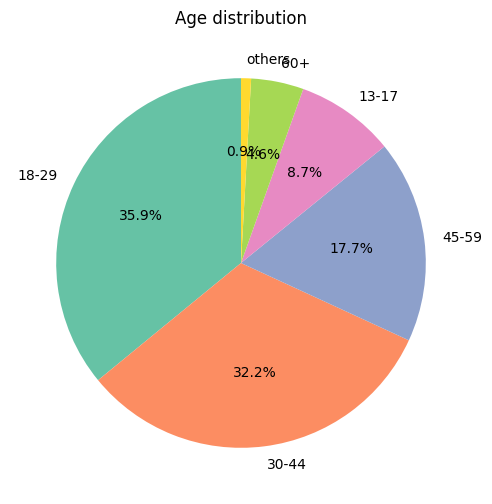

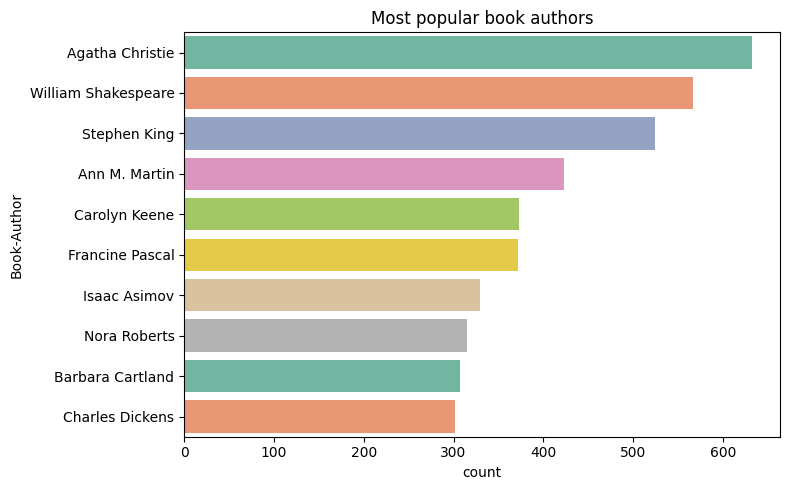

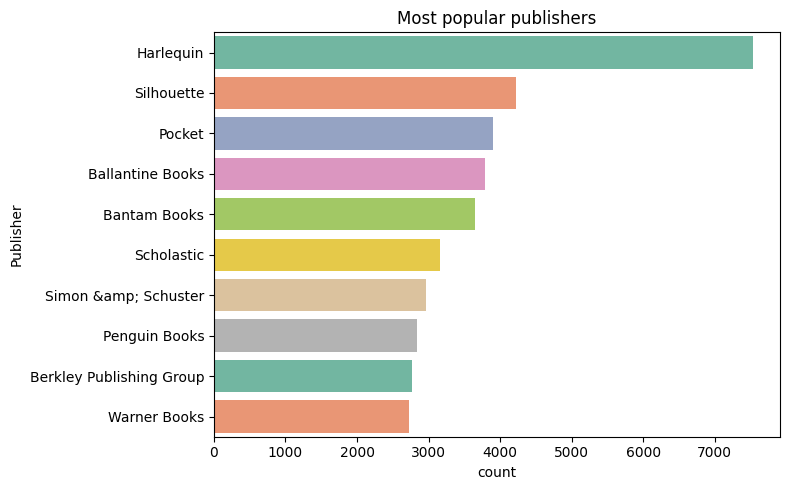

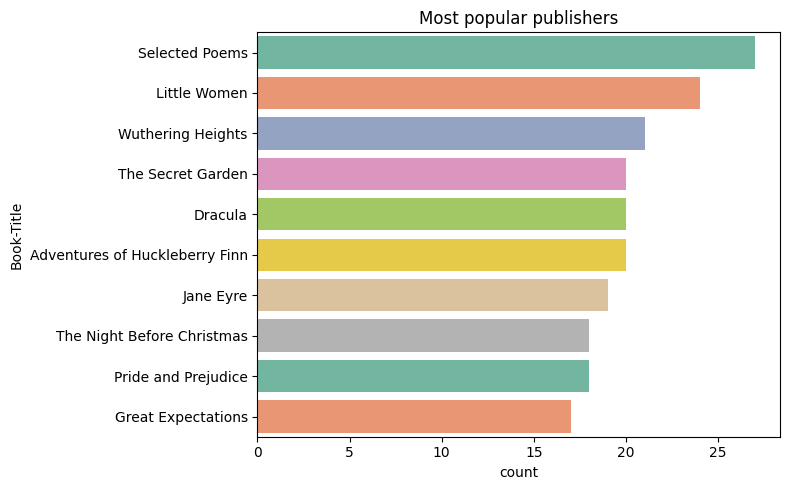

In [5]:
from brs.analysis import PieChartInspection
from brs.analysis import BarChartInspection
from brs.analysis import NAInspection

NAInspection(dataset_name="users").inspect(data_users)
NAInspection(dataset_name="books").inspect(data_books)
NAInspection(dataset_name="ratings").inspect(data_ratings)

PieChartInspection("Countries", title="Countries distribution", top_n=7, dropna=False).inspect(data_users)
PieChartInspection("Age_group", title="Age distribution", top_n=5, dropna=True).inspect(data_users)

BarChartInspection("Book-Author", title="Most popular book authors", top_n=10, dropna=False).inspect(data_books)
BarChartInspection("Publisher", title="Most popular publishers", top_n=10, dropna=False).inspect(data_books)
BarChartInspection("Book-Title", title="Most popular publishers", top_n=10, dropna=False).inspect(data_books)

In [6]:
# from brs.ingestion import GoogleBooksEnrichment

# data = GoogleBooksEnrichment(download=False).load_dataset("books")
# data.iloc[90:].head(11)

In [7]:
import pandas as pd
dp = os.path.join(config.root_dir, "data", "raw", "kaggle-books", "books_enriched.csv")
data = pd.read_csv(dp, low_memory=False)

In [8]:
data["enriched"] = False
data.loc[0:99, "enriched"] = True

In [9]:
data.to_csv(dp, index=False)

In [10]:
print(data["Book-Author"].map(type).value_counts())  

Book-Author
<class 'str'>      271358
<class 'float'>         2
Name: count, dtype: int64


In [11]:
from brs.ingestion import GoogleBooksEnrichment

data = GoogleBooksEnrichment(download=True, limit=100).load_dataset("books")

d:\z\Conspects\_Summer\BRS\brs\ingestion\google_books_enrichment.py:43: DtypeWarning: Columns (3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  pdf = pd.read_csv(self.df_path)
2025-08-23 00:14:47,715 [INFO] brs.ingestion.google_books_enrichment: Dataframe iteration saved
2025-08-23 00:16:29,603 [INFO] brs.ingestion.google_books_enrichment: Dataframe iteration saved
2025-08-23 00:16:30,562 [INFO] brs.ingestion.google_books_enrichment: Dataset enrichment successfully finished
2025-08-23 00:16:32,562 [INFO] brs.ingestion.google_books_enrichment: Dataframe iteration saved


In [13]:
data_books.count()

ISBN                   271360
Book-Title             271360
Book-Author            271358
Year-Of-Publication    271360
Publisher              271358
Image-URL-S            271360
Image-URL-M            271360
Image-URL-L            271357
dtype: int64